In [1]:
import anal as pm

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as patches
from mpl_toolkits.axes_grid1 import make_axes_locatable
  


import numdifftools as nd

import locale
locale.setlocale(locale.LC_ALL, 'de_DE.utf8')
plt.rcParams['axes.formatter.use_locale'] = True

In [2]:
plt.rc('font', size=10) #controls default text size
plt.rc('axes', titlesize=8) #fontsize of the title
plt.rc('axes', labelsize=10) #fontsize of the x and y labels
plt.rc('xtick', labelsize=8) #fontsize of the x tick labels
plt.rc('ytick', labelsize=8) #fontsize of the y tick labels
plt.rc('legend', fontsize=8) #fontsize of the legend

In [3]:
f = pm.cofe_room_t()
f.load()
f.preprocess()
f.process()

loading set: 0
loading set: 1
loading set: 2
loading set: 3
loading set: 4
loading set: 5
loading set: 6
loading set: 7
loading set: 8
loading set: 9
preprocessing set: 0
preprocessing set: 1
preprocessing set: 2
preprocessing set: 3
preprocessing set: 4
preprocessing set: 5
preprocessing set: 6
preprocessing set: 7
preprocessing set: 8
preprocessing set: 9
processing set: 0
processing set: 1
processing set: 2
processing set: 3
processing set: 4
processing set: 5
processing set: 6
processing set: 7
processing set: 8
processing set: 9


In [4]:
f.analyze()

analyzing set: 0
analyzing set: 1
analyzing set: 2
analyzing set: 3
analyzing set: 4
analyzing set: 5
analyzing set: 6
analyzing set: 7
analyzing set: 8
analyzing set: 9
postprocessing


In [5]:
k = f[6].fit_anisotropy.results.x
ssr = f[6].fit_anisotropy.obj(f[6].fit_anisotropy.results.x)

In [6]:
e1 = 0.3
ex1 = [(k[0]-e1)*2, (k[0]+e1)*2]
ey1 = [(k[1]-e1)*2, (k[1]+e1)*2]


x = np.linspace(*ex1,50)
y = np.linspace(*ey1,50)
xx, yy = np.meshgrid(x, y)

Bx = np.linspace(-10,10,50)
By = np.linspace(-10,10,50)
Bxx, Byy = np.meshgrid(Bx, By)

In [7]:
def g1(x,y):
    return f[6].fit_anisotropy.obj([x/2,y/2,k[2],k[3]])
def g2(x,y):
    return f[6].fit_anisotropy.obj([x/2,y/2,k[2],k[3]])


zz = np.vectorize(g1)(xx,yy)
Bzz = np.vectorize(g1)(Bxx,Byy)

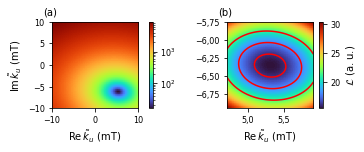

In [8]:
fig, (ax1,ax2) = plt.subplots(1,2,constrained_layout=True, figsize=(5,2))

ax1.text(-0.1, 1.08, "(a)", transform=ax1.transAxes)
ax2.text(-0.1, 1.08, "(b)", transform=ax2.transAxes)

mp1 = ax1.imshow(Bzz*100000, 
           extent=[-10,10,-10,10], origin='lower',
            cmap=plt.get_cmap('turbo'),
                norm=colors.LogNorm())

mp2 = ax2.imshow(zz*100000, 
           extent=ex1+ey1, origin='lower',
            cmap=plt.get_cmap('turbo'))
ax2.contour(xx,yy,zz, levels=ssr*(1+1./25*np.array([1,4,9])),colors='red')


fig.colorbar(mp1, ax=ax1, fraction=0.05, pad=0.04)
cbar = fig.colorbar(mp2, ax=ax2, fraction=0.05, pad=0.04)
cbar.set_label(r'$\mathcal{L}$ (a. u.)')

ax2.set_xlabel(r"$\operatorname{Re} \tilde{k}_u$ (mT)")
ax1.set_xlabel(r"$\operatorname{Re} \tilde{k}_u$ (mT)")
ax1.set_ylabel(r"$\operatorname{Im} \tilde{k}_u$ (mT)")

fig.savefig('out/ukazka-k.pdf')